# MNIST Dataset. Linear Regression
# MNIST 数据集。 线性回归

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Загрузка данных

In [2]:
from tensorflow.keras.datasets.mnist import load_data
(src_X_train, src_labels_train), (src_X_test, src_labels_test) = load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Что в итоге загрузилось?

In [3]:
print(src_X_train.shape)
print(src_X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


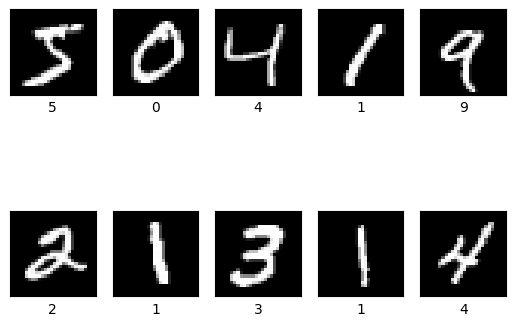

In [4]:
plt.subplots(2,5)
#plt.subplots(2,5, figsize=(12,5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    ax.imshow(src_X_train[i], cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel(src_labels_train[i])
plt.show()

## Предварительная обработка данных

In [5]:
# Data normalization
X_train = 2*(src_X_train/255) -1
X_test = 2*(src_X_test/255) - 1

y_train = src_labels_train
y_test = src_labels_test

print(X_train.shape)
# Flatten the data
# 2d to 1d conversion
(cnt, width, height) = X_train.shape
X_train_flattened = X_train.reshape(cnt, width*height)
X_test_flattened = X_test.reshape(len(X_test), width*height)
print(X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


## Logistic Regression
Logistic Regression classifier: [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [6]:
# Step 1. Import the model you want to use
from sklearn.linear_model import LogisticRegression

# Step 2. Make an instance of the Model
logisticRegr = LogisticRegression(solver = 'newton-cholesky')
#logisticRegr = LogisticRegression(fit_intercept=True,
#                        multi_class='auto',
#                        penalty='l2',
#                        solver='saga',
#                        max_iter=1000,
#                        C=50)

# Step 3. Training the model on the data
logisticRegr.fit(X_train_flattened, y_train)

LogisticRegression(solver='newton-cholesky')

In [7]:
#Step 4. Predict the labels of new data
#logisticRegr.predict(X_test_flattened[0].reshape(1,-1))
logisticRegr.predict(X_test_flattened[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [8]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

## Оценка модели

In [9]:
score = logisticRegr.score(X_test_flattened, y_test)
print(score)

0.9198


In [10]:
# Make predictions on test data
predictions = logisticRegr.predict(X_test_flattened)

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


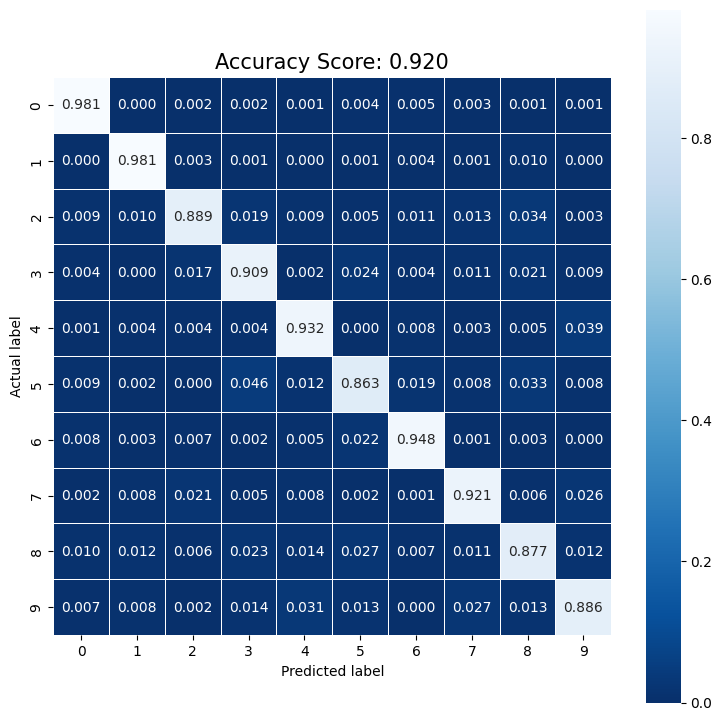

In [11]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

## Ошибки классификации

In [12]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1

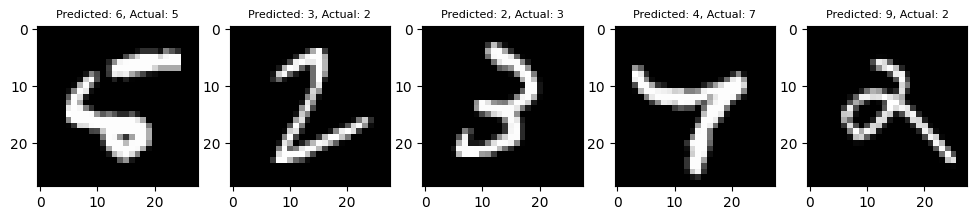

In [13]:
plt.figure(figsize=(12,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(src_X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], src_labels_test[badIndex]), fontsize = 8)

# Визуализация коэффициентов

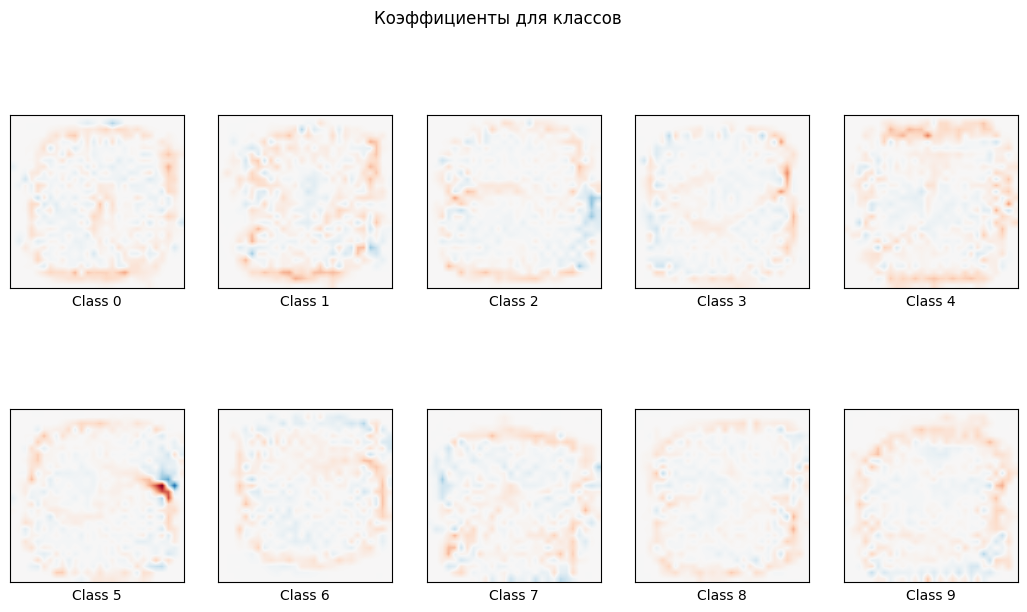

In [14]:
coef = logisticRegr.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10):
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28),
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    #coef_plot.imshow(coef[i].reshape(28,28), cmap='gray')

    coef_plot.set_xticks(())
    coef_plot.set_yticks(())
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Коэффициенты для классов');